# **PCA and t-SNE Project: Auto MPG**


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.
The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. The goal is to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this project is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
We will use Auto MPG dataset which has
8 variables: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [102]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
import warnings 
warnings.filterwarnings('ignore')

### **Loading the data**

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [7]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column. 
- First, we need to **replace the ? with np.nan**.

In [8]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# Let's impute missing values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
arr=imputer.fit_transform(data)
arr

array([[  18. ,    8. ,  307. , ..., 3504. ,   12. ,   70. ],
       [  15. ,    8. ,  350. , ..., 3693. ,   11.5,   70. ],
       [  18. ,    8. ,  318. , ..., 3436. ,   11. ,   70. ],
       ...,
       [  32. ,    4. ,  135. , ..., 2295. ,   11.6,   82. ],
       [  28. ,    4. ,  120. , ..., 2625. ,   18.6,   82. ],
       [  31. ,    4. ,  119. , ..., 2720. ,   19.4,   82. ]])

In [10]:
# Let's put resulting array back to dataframe
data=pd.DataFrame(data=arr,index=data.index,columns=data.columns)

In [11]:
# Let's check the dataset for missing values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

We see that there is no missing data in the dataset

### **Summary Statistics**

In [12]:
# Let's see the description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.178894,38.347728,46.0,75.000,92.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**

- There might be outliers in displacement, horsepower and weight
- Vintage cars in our dataset are on average were produced in 1976
- There are no superfast and superpowerful cars in our dataset as the best acceleration result is 8 sec
  and the highest horsepower is 230. 
- On average cars are rather slow and heavy with median acceleration of 15.5 sec, horsepower 92.5 and weight 2,803 kg

### **Let's check the distribution and outliers for each column in the data**

mpg
Skew : 0.46


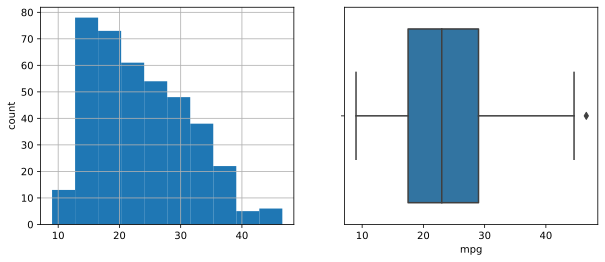

cylinders
Skew : 0.53


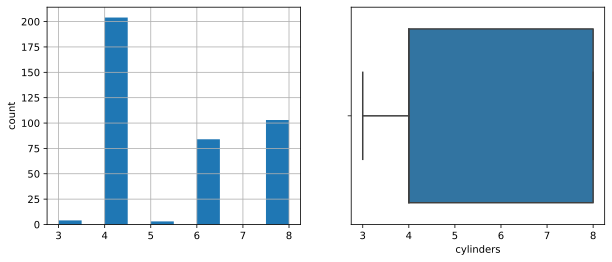

displacement
Skew : 0.72


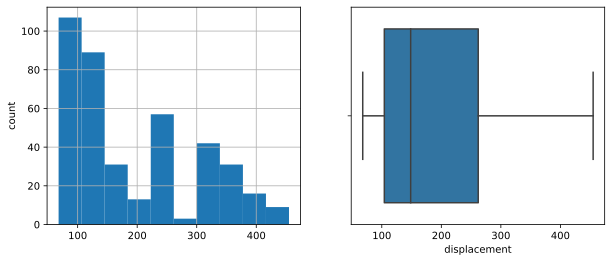

horsepower
Skew : 1.1


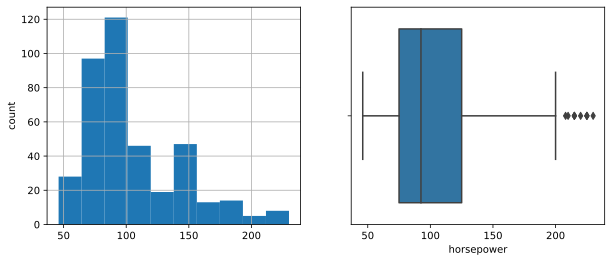

weight
Skew : 0.53


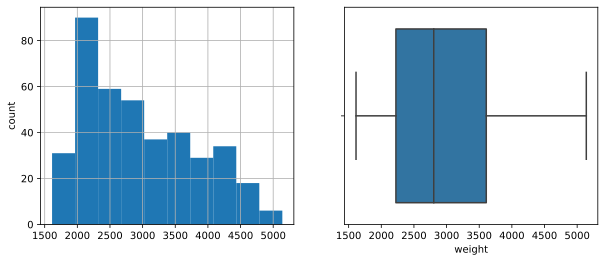

acceleration
Skew : 0.28


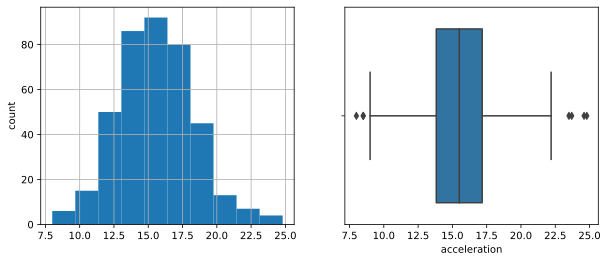

model year
Skew : 0.01


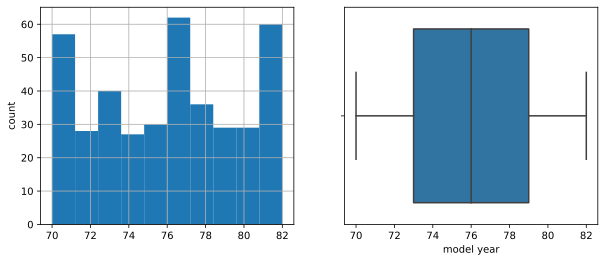

In [13]:
for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (10, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist()
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x=data[col])
    
    plt.show()

**Observations:**

- There are potential outliers in acceleration, horsepower and mpg. But after looking closely at these values they
  seem legit, so most probably these potential outliers are just extreme values in our dataset. 
- Most of the cars have standard 4-cylinder engines
- Acceleration is suprisingly have quite low skew to the right and is very close to Gaussian Distribution
- The mpg, displacement, horsepower, weight have right skewed distributions which is expectable
- The cars in our dataset were produced from 1970 to 1982. The distribution reminds uniform with 3 prominent peaks   at 1970, 1976 and 1982

### **Checking the correlation**

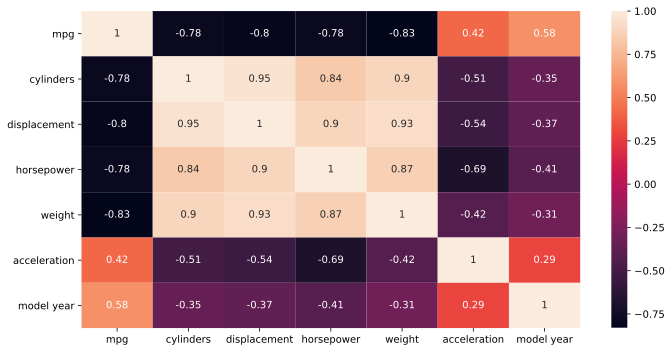

In [14]:
plt.figure(figsize = (10, 5))

sns.heatmap(data.corr(), annot = True)

plt.tight_layout()

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight
- horsepower and acceleration are negatively correlated
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg, which can mean that newer cars are more effecient due to development of technologies done from 1970 to 1982, or age of a car affects negatively its mpg

### **Scaling the data**

In [15]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data),index=data.index, columns = data.columns)

In [16]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.674189,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.588038,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.196388,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.196388,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935289,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

In [67]:
# Defining the number of principal components to generate 
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components=n,svd_solver='full') 

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

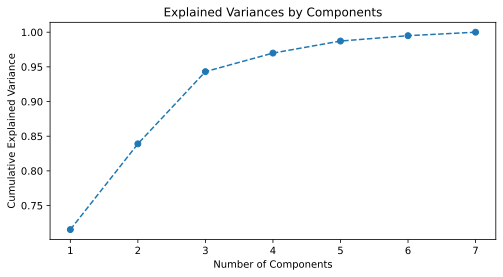

In [68]:
# Let's visualize the explained variance by individual components
plt.figure(figsize = (8, 4))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [69]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


In [70]:
# Let's put PCA components in a dataframe (these are linear combination of the original features) 
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.03,0.89
model year,-0.23,-0.91,-0.02


In [71]:
# Let's make an approximation of a threshold to consider features as to be important or not
threshold=np.round(data_pca.abs().mean().mean(),2)
threshold

0.3

In [72]:
def color_high(val):
    if val <= -threshold:
        return 'background: pink'
    
    elif val >= threshold:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.030000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**

- The first component seems to be associated high number of cylinders, displacement, horsepower and weight and with low mpg. So it seems to capture attributes that define big, heavy, powerfull cars which have high fuel consumption.
- The secong component seems to capture atributes of more new cars. 
- The third component captures atributes of slower cars with higher acceleration values.

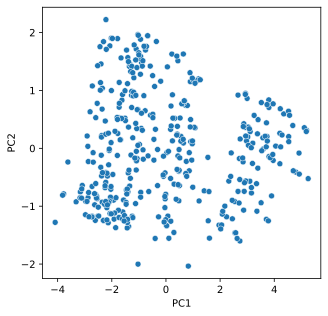

In [76]:
# Let's visualize the data in 2 dimensions using the first two principal components 
plt.figure(figsize = (5, 5))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

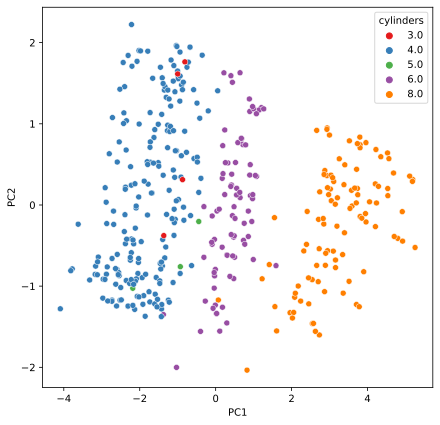

In [98]:
# Let's try adding hue to the scatter plot

df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))

sns.scatterplot(x=df_concat[0],y=df_concat[1],hue=df_concat['cylinders'],palette='Set1')

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:**

- The more powerful and heavy the car is the more cylinders it has, which is very logical
- There is no strong relation vs PC2 and the number of cylinders, but older cars tend to have more cylinders in our dataset

## t-SNE

In [103]:
tsne = TSNE(n_components=2,random_state=1)   

data_tsne =tsne.fit_transform(data_scaled)

In [104]:
data_tsne.shape

(398, 2)

In [105]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [112]:
data_tsne.head()

,Component 1,Component 2
0,-33.186298,-10.101710
1,-33.400162,-12.146459
2,-33.549870,-11.046040
3,-32.978336,-10.893054
4,-33.723152,-10.606791


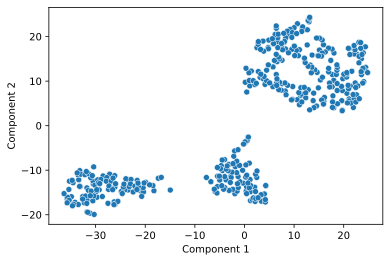

In [107]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

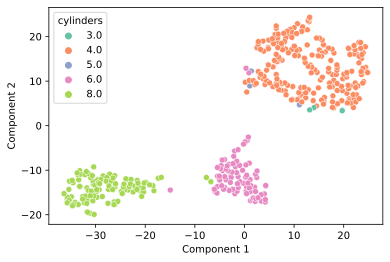

In [110]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders,palette='Set2')

plt.show()

**Observations:**

There are 3 distinct clusters in our data set with cars having 8, 6 and 4 cylinders respectively

In [139]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    
    second_component = x['Component 2']
    
    if (first_component > 0) and (second_component > 0): 
        return 'group_1'
    
    if (first_component > -10 ) and (second_component < 0):
        return 'group_2'
    
    else: 
        return 'group_3'

In [140]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

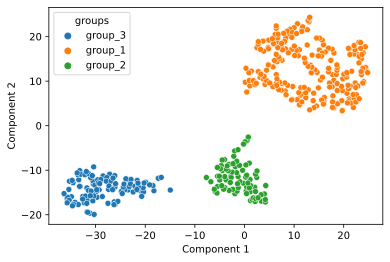

In [141]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [142]:
data['groups'] = data_tsne['groups'] 

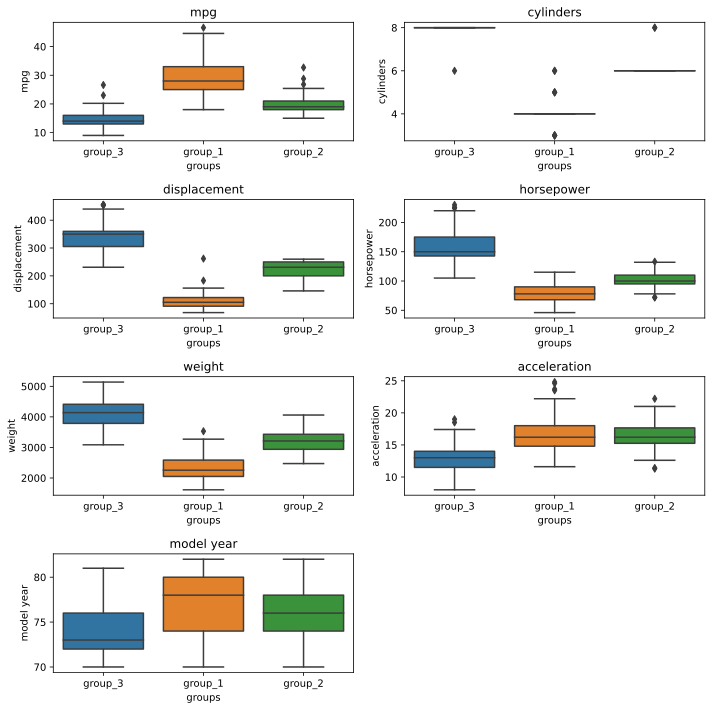

In [147]:
all_col = data.columns.tolist()

plt.figure(figsize = (10, 10))

for i, variable in enumerate(all_col): 
    if i == 7:
        break
    
    plt.subplot(4, 2, i + 1)
    
    sns.boxplot(x=data['groups'],y=data[variable])      # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:**

- There are 3 groups in data. Each group has it's distinct characteristics
- The first group represents fuel effective cars with high mpg (around 27), low number of cylinders (4), low displacement (around 100 cubic inches), low horsepower (around 75), low weight (~ 2,200 lbs), average acceleration (~ 16 sec) and relatively new (~ 1978 year of production). 
- The second group represents with moderate fuel economy (~ 18 mpg), relatively high number of cylinders (6), moderate displacement ( around 230 cubic inches), moderate horsepower (~ 90), moderate weight (~ 3200 lbs), average acceleration (~ 16 sec) and with model year of around 1976
- The third group represents powerful heavy cars of low mpg (~  14), high number of cylinders (8), high displacement (~ 350 cubic inches), high horsepower (~ 150), high weight (~ 4100 lbs), better acceleration (~ 13 sec) and relatively old (~ 1974). 

According to the data at disposal I recomend starting to focus on the segments described above to target the auditory.